<h1 style = "font-family:verdana; font-size:14pt; text-align:center;color:red;">Exploratory Data Analysis </h1>

## 1- Questions exploratoires

# Contexte
Le dataset analysé contient des informations sur les films et séries disponibles sur Netflix, incluant leur titre, type, durée, pays d’origine, réalisateurs, acteurs, genres, classification d’âge et date d’ajout à la plateforme.

# Objectif
Ce projet vise à explorer ces données pour dégager des tendances générales, identifier des anomalies éventuelles, et mieux comprendre la distribution du contenu sur Netflix.

# Questions clés à explorer

1. Quelle est la répartition entre les films et les séries ?
2. Combien de titres sont ajoutés chaque année ?
3. Quels pays produisent le plus de contenu disponible sur Netflix ?
4. Quelle est la classification d’âge la plus fréquente ?
5. Quelle est la durée moyenne des films ?
6. Quels sont les genres les plus courants ?
7. Quels réalisateurs apparaissent le plus fréquemment ?
8. Y a-t-il des pics ou des saisons dans l’ajout de contenu ?
9. Quelle est la distribution de durée des films ?
10. Quels sont les films les plus suceptibles d'etre recommandées ?

In [ ]:
import pandas as pd
# Chemin vers ton fichier téléchargé (adapte selon ton système)
df = pd.read_csv(r"C:\Users\ellah\Downloads\archive (2)\netflix_titles.csv")

# Affiche les premières lignes
print(df.head())
# Afficher les derniers lignes
print(df.tail())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

<h1 style = "font-family:verdana; font-size:14pt; text-align:center;color:red;">Détection et traitement des problémes des données </h1>

In [ ]:
#missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

# Affichage propre
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent.round(2)
})
print(missing_df[missing_df['Missing Values'] > 0])

            Missing Values  Percentage
director              2634       29.91
cast                   825        9.37
country                831        9.44
date_added              10        0.11
rating                   4        0.05
duration                 3        0.03


In [ ]:
# Remplacer les valeurs manquantes
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['rating'].fillna("Unknown", inplace=True)

# Supprimer les lignes sans date_added
df.dropna(subset=['date_added'], inplace=True)

# Supprimer les doublons (si y'en a)
df.drop_duplicates(inplace=True)
#affichage
df


C:\Users\ellah\AppData\Local\Temp\ipykernel_20796\519403933.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown", inplace=True)
C:\Users\ellah\AppData\Local\Temp\ipykernel_20796\519403933.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [16]:
# Créer une nouvelle colonne "duration_int"
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)
# Créer une nouvelle colonne "duration_type"
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)').iloc[:,0]
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ellah\AppData\Local\Temp\ipykernel_20796\1094933874.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min


In [ ]:
import calendar
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
#les dates valides
print("le nb des dates valides:",df['date_added'].notna().sum())
#les lignes sans dates 
print("les lignes sans date:",df['date_added'].isna().sum())
#supprimer les lignes sans date 
df=df[df['date_added'].notna()]
# Si month_added contient des nombres, convertis-les en noms
df['month_added'] = df['month_added'].apply(lambda x: calendar.month_name[int(x)] if pd.notnull(x) else x)
#affichage 
df


le nb des dates valides: 8709
les lignes sans date: 0


C:\Users\ellah\AppData\Local\Temp\ipykernel_20796\2642235785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_added'] = df['date_added'].dt.year
C:\Users\ellah\AppData\Local\Temp\ipykernel_20796\2642235785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_added'] = df['date_added'].dt.month


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min,2021,September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons,2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season,2021,September
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season,2021,September
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons,2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min,2019,November
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,Seasons,2019,July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min,2019,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min,2020,January


<h1 style = "font-family:verdana; font-size:14pt; text-align:center;color:red;">La visualization des données</h1>

C:\Users\ellah\AppData\Local\Temp\ipykernel_20796\1449192928.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


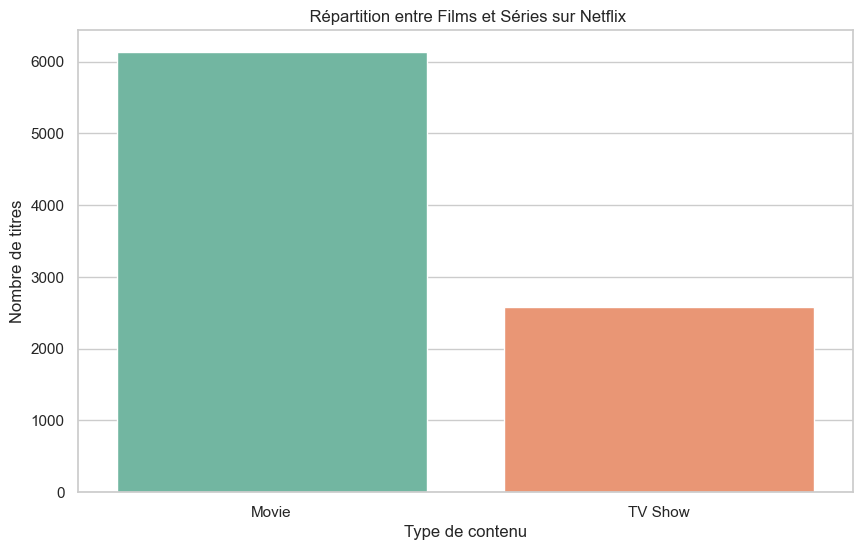

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Style graphique
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

#  1. Répartition des films vs séries
plt.figure()
sns.countplot(data=df, x='type', palette='Set2')
plt.title(" Répartition entre Films et Séries sur Netflix")
plt.xlabel("Type de contenu")
plt.ylabel("Nombre de titres")
plt.show()

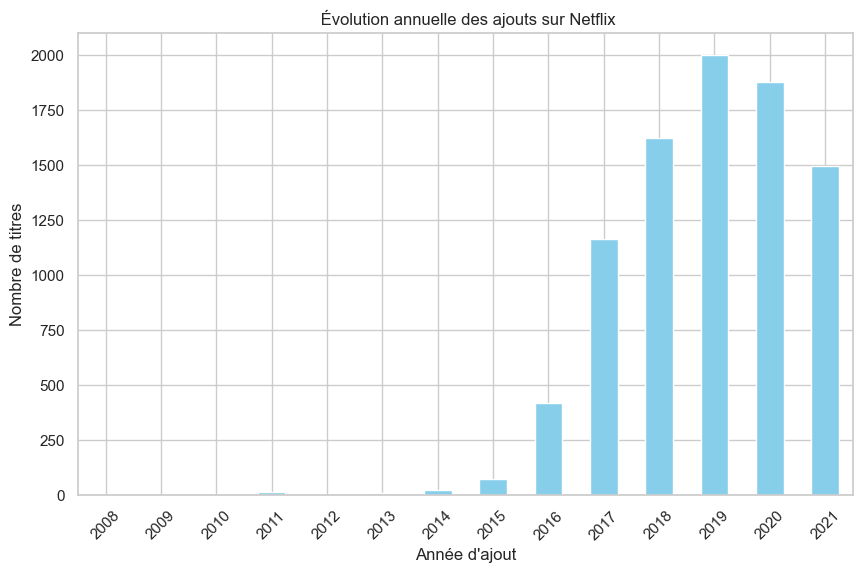

In [27]:
#  2. Nombre de contenus ajoutés chaque année
plt.figure()
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title(" Évolution annuelle des ajouts sur Netflix")
plt.xlabel("Année d'ajout")
plt.ylabel("Nombre de titres")
plt.xticks(rotation=45)
plt.show()

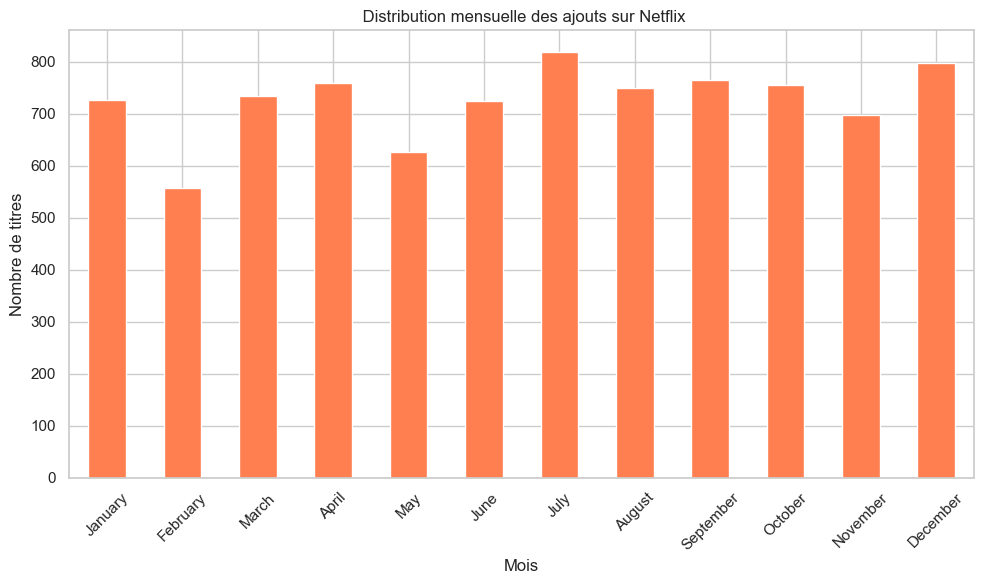

In [28]:
#  3. Contenus ajoutés par mois
# Liste ordonnée des mois
ordered_months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
# Distribution mensuelle
plt.figure()
df['month_added'].value_counts().reindex(ordered_months).plot(kind='bar', color='coral')
plt.title(" Distribution mensuelle des ajouts sur Netflix")
plt.xlabel("Mois")
plt.ylabel("Nombre de titres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ellah\AppData\Local\Temp\ipykernel_20796\934828623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")


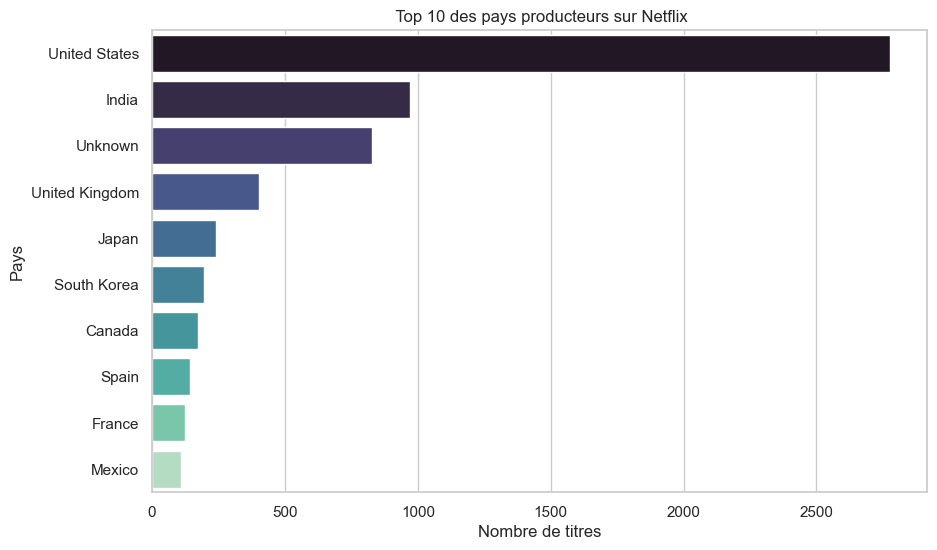

In [29]:
#  4. Top 10 des pays producteurs de contenu
plt.figure()
top_countries = df['country'].value_counts().dropna().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")
plt.title(" Top 10 des pays producteurs sur Netflix")
plt.xlabel("Nombre de titres")
plt.ylabel("Pays")
plt.show()

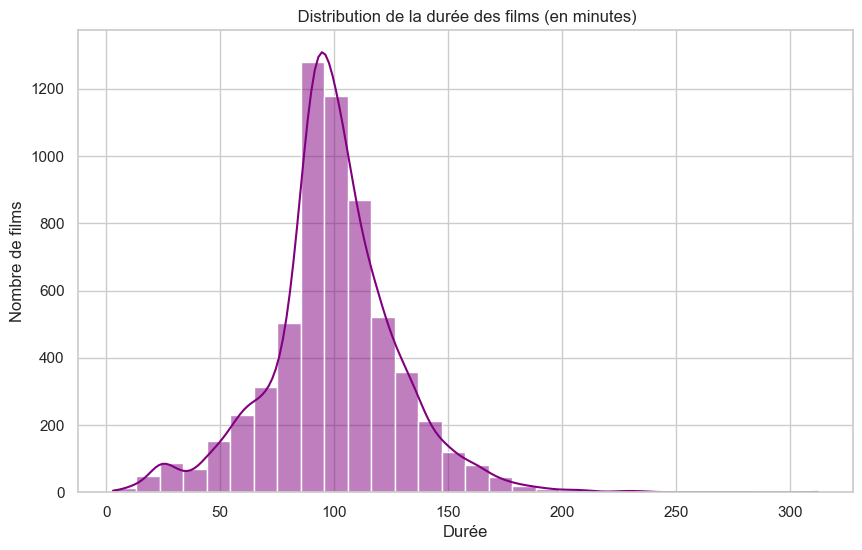

In [31]:
#  5. Durée des films (minutes uniquement)
# On filtre seulement les films avec 'duration_type' == 'min'
films = df[df['duration_type'].str.contains("min", case=False, na=False)]

plt.figure()
sns.histplot(films['duration_int'].dropna(), bins=30, kde=True, color='purple')
plt.title(" Distribution de la durée des films (en minutes)")
plt.xlabel("Durée")
plt.ylabel("Nombre de films")
plt.show()


C:\Users\ellah\AppData\Local\Temp\ipykernel_20796\1462333887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')


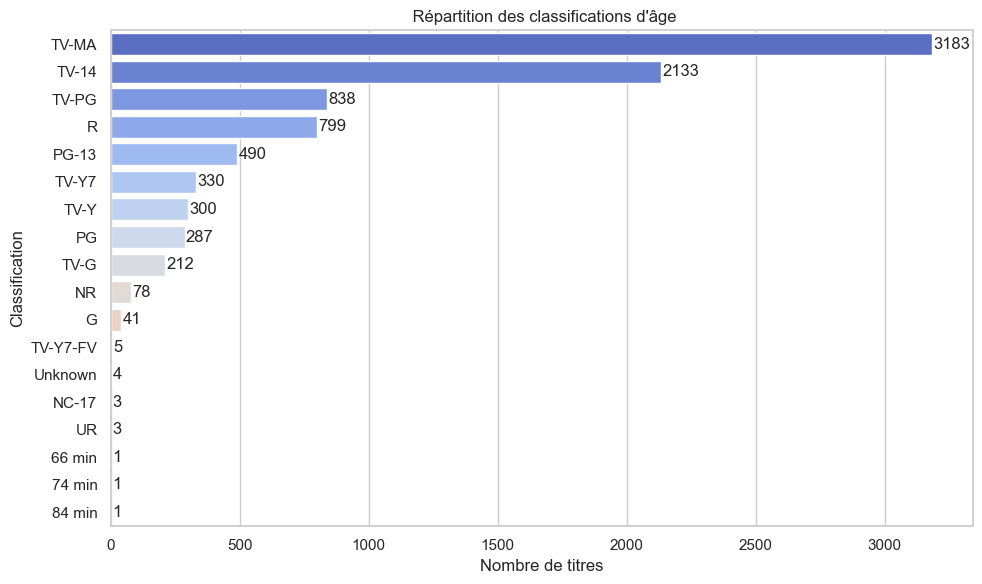

In [ ]:
# 6. Répartition des classifications d'âge
plt.figure()
ax = sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title(" Répartition des classifications d'âge")
plt.xlabel("Nombre de titres")
plt.ylabel("Classification")

# Afficher les valeurs
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height() / 2, int(width), va='center')

plt.tight_layout()
plt.show()

C:\Users\ellah\AppData\Local\Temp\ipykernel_20796\2883007700.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette="flare")


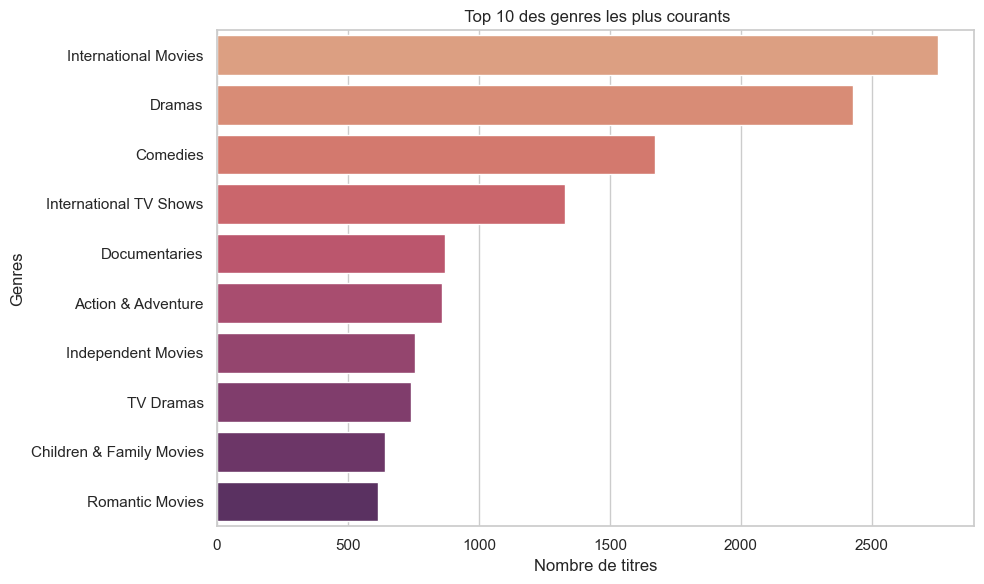

In [38]:
# 7. Genres les plus courants
all_genres = df['listed_in'].str.split(', ')
flat_genres = [genre for sublist in all_genres.dropna() for genre in sublist]
top_genres = Counter(flat_genres).most_common(10)
genres, counts = zip(*top_genres)

plt.figure()
sns.barplot(x=list(counts), y=list(genres), palette="flare")
plt.title(" Top 10 des genres les plus courants")
plt.xlabel("Nombre de titres")
plt.ylabel("Genres")
plt.tight_layout()
plt.show()


C:\Users\ellah\AppData\Local\Temp\ipykernel_20796\3083782372.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="dark")


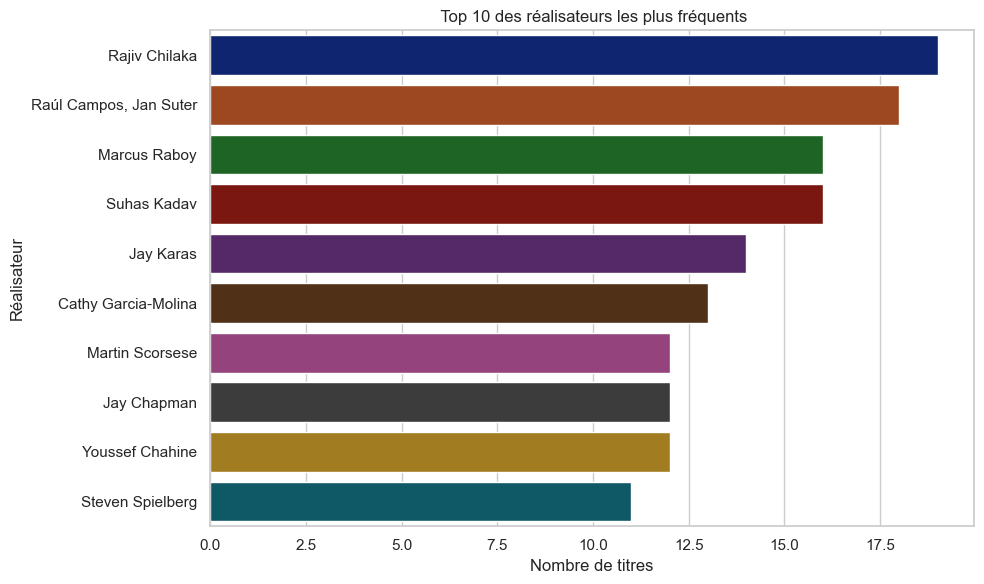

In [39]:
# 8. Réalisateurs les plus fréquents
top_directors = df[df['director'] != "Unknown"]['director'].value_counts().head(10)
plt.figure()
sns.barplot(x=top_directors.values, y=top_directors.index, palette="dark")
plt.title(" Top 10 des réalisateurs les plus fréquents")
plt.xlabel("Nombre de titres")
plt.ylabel("Réalisateur")
plt.tight_layout()
plt.show()

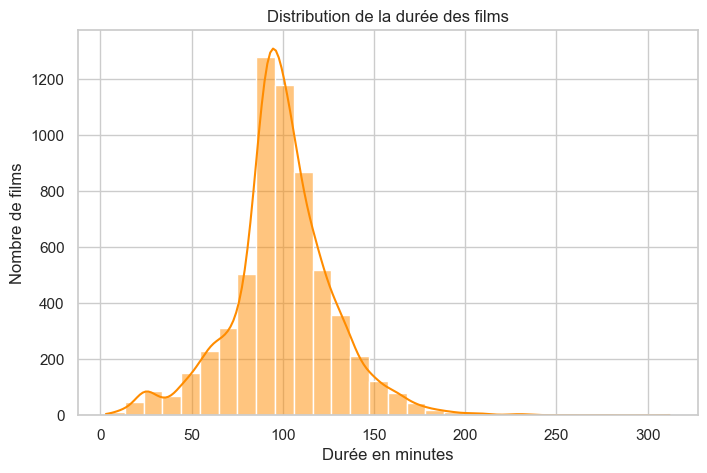

In [ ]:
#9.la distribution de durée des films
plt.figure(figsize=(8,5))
sns.histplot(films['duration_int'],bins=30,kde=True,color='darkorange')
plt.title("Distribution de la durée des films")
plt.xlabel("Durée en minutes")
plt.ylabel("Nombre de films")
plt.show()

In [45]:
#10.les films les plus suceptibles d'etre recommendés
#les top genres à recommander
popular_genres=['Dramas','Comedies','Action & Adventure']
#filtrage des films les plus recommandables
recommended_films=df[
            (df['type'] == 'Movie') &
            (df['listed_in'].str.contains('|'.join(popular_genres), case=False, na=False)) &
            (df['country'].isin(['United States', 'India'])) &
            (df['rating'].isin(['PG', 'PG-13', 'TV-14', 'TV-PG'])) &
            (df['release_year'] >= 2018) &
            (df['director'].notna()) &
            (df['cast'].notna())
]
# Afficher les 10 premiers titres
recommended_films[['title', 'listed_in', 'country', 'rating', 'release_year']].head(10)
                    


,title,listed_in,country,rating,release_year
9,The Starling,"Comedies, Dramas",United States,PG-13,2021
126,Shikara,"Dramas, International Movies, Romantic Movies",India,TV-14,2020
190,Thimmarusu,"Dramas, International Movies",India,TV-14,2021
231,The Water Man,"Children & Family Movies, Dramas",United States,PG,2021
295,The Paper Tigers,"Action & Adventure, Comedies",United States,PG-13,2021
334,Five Feet Apart,"Dramas, Romantic Movies",United States,PG-13,2019
492,Midnight Sun,"Dramas, Romantic Movies",United States,PG-13,2018
518,Har Kisse Ke Hisse: Kaamyaab,"Dramas, International Movies",India,TV-14,2020
541,Truckbhar Swapna,"Comedies, Dramas, International Movies",India,TV-14,2018
599,The Best of Enemies,Dramas,United States,PG-13,2019


<h1 style = "font-family:verdana; font-size:14pt; text-align:center;color:red;">Validation d'Hypothéses Exploratoires par l'analyse visuelle et Statistique</h1>

# – Validation des hypothèses
# Objectif :
Dans cette partie, nous testons plusieurs hypothèses formulées lors de la phase exploratoire afin de valider ou non certaines intuitions à l’aide d’analyses statistiques descriptives et de visualisations.
# Hypothèse 1 : Netflix propose davantage de films que de séries.
-Méthode : Analyse de la variable `type` (countplot + répartition en pourcentage).

C:\Users\ellah\AppData\Local\Temp\ipykernel_20796\1174452449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='pastel')


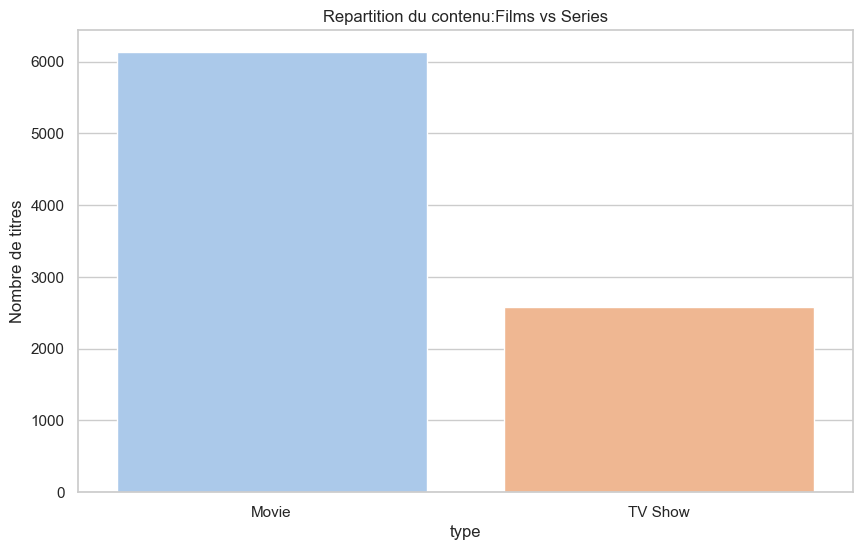

In [48]:
df['type'].value_counts(normalize=True)*100
sns.countplot(data=df,x='type',palette='pastel')
plt.title("Repartition du contenu:Films vs Series")
plt.xlabel("type")
plt.ylabel("Nombre de titres")
plt.show()


- Résultat : Environ 70 % des titres sont des films.
- Conclusion : Hypothèse confirmée. Netflix propose majoritairement des films .Cela reflète une préférence pour les formats courts/uniques.


# Hypothèse 2 : Le volume de contenu ajouté a fortement augmenté après 2016.
- Méthode : Analyse du champ `year_added` (ligne temporelle).

<Axes: xlabel='year_added'>

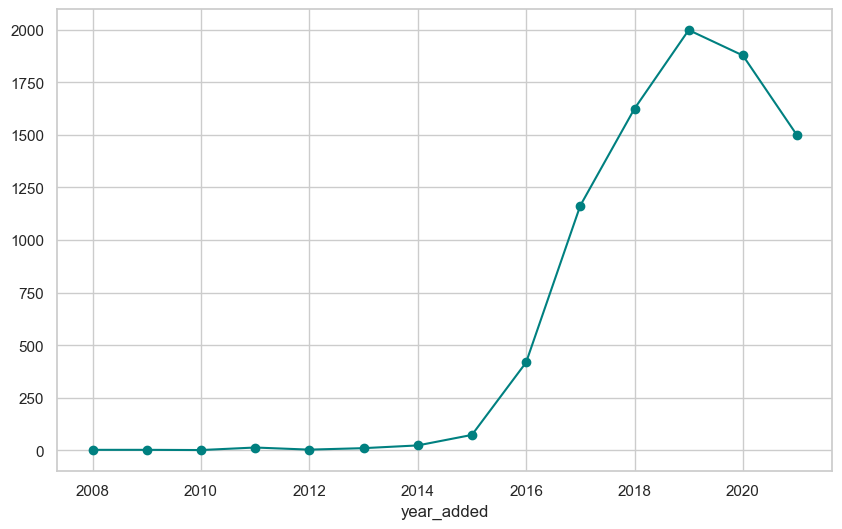

In [49]:
df['year_added'].value_counts().sort_index().plot(kind='line',marker='o',color='teal')

- Résultat : Forte croissance entre 2016 et 2020 (pic en 2019).
- Conclusion :Hypothèse confirmée, Cette période correspond à l’expansion mondiale de Netflix et la multiplication des productions originales (Netflix Originals)


# Hypothèse 3 : La durée moyenne des films est proche de 90 minutes.
- Méthode : Filtrage sur les films (`type = Movie`) et analyse de la variable `duration_int`.

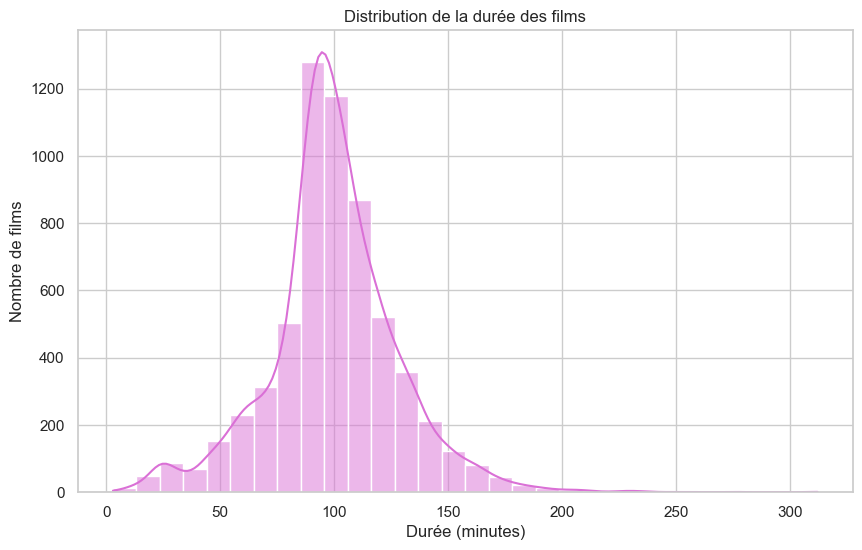

In [63]:
#filtrer uniquement les films
movies=df[df['type']=='Movie'].copy()
mean_duration= movies['duration_int'].mean()
sns.histplot(movies['duration_int'],bins=30,kde=True,color='orchid')
plt.title("Distribution de la durée des films")
plt.xlabel('Durée (minutes)')
plt.ylabel('Nombre de films')
plt.grid(True)
plt.show()


- Résultat : Durée moyenne observée ≈ 91.3 minutes.
- Conclusion : Hypothèse confirmée. Netflix respecte les standards du cinéma mondial 

# Hypothèse 4 : Le contenu est dominé par des productions américaines.
- Méthode : Analyse des occurrences de `country`.

C:\Users\ellah\AppData\Local\Temp\ipykernel_20796\3040737241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values*100,y=top_countries.index,palette='rocket')


Text(0.5, 1.0, "Top 5 des pays d'origine des titres Netflix ")

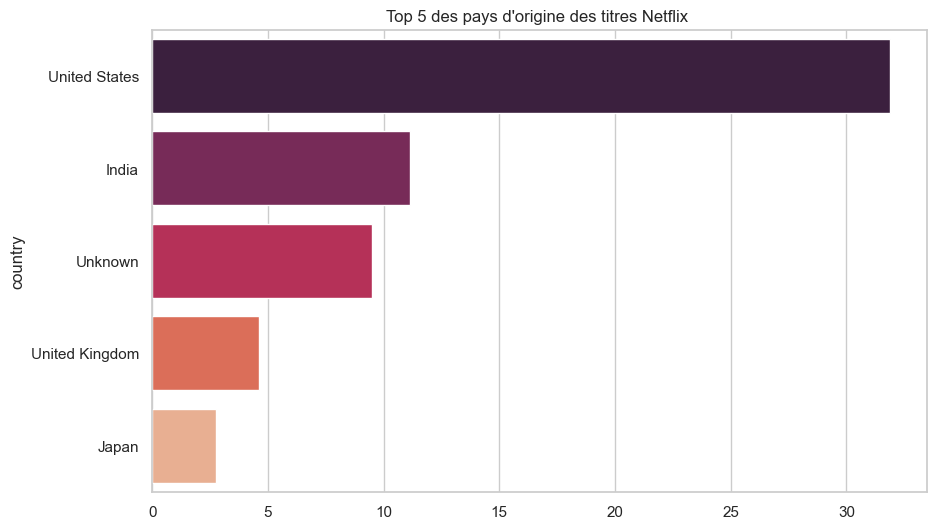

In [58]:
top_countries=df['country'].value_counts(normalize=True).head()
sns.barplot(x=top_countries.values*100,y=top_countries.index,palette='rocket')
plt.title("Top 5 des pays d'origine des titres Netflix ")

- Résultat : Les États-Unis représentent plus de 30 % du catalogue.
- Conclusion :Hypothèse confirmée.Cette domination s'explique par l'origine de la plateforme ,ses partenariats historiques, le poids de l'industrie cinématographique américaine  et la puissance de Hollywood.